# Monte Carlo simulation

Paper: **Autoencoder asset pricing by Kelly et al 2019**

In [1]:
import numpy as np

In [2]:
from autoencoder.simulation import simulate

In [3]:
import matplotlib.pyplot as plt

In [4]:
(
    n_betas, l_betas,
    n_returns, l_returns,
    n_managed, l_managed,
    characteristics, factors
) = simulate()


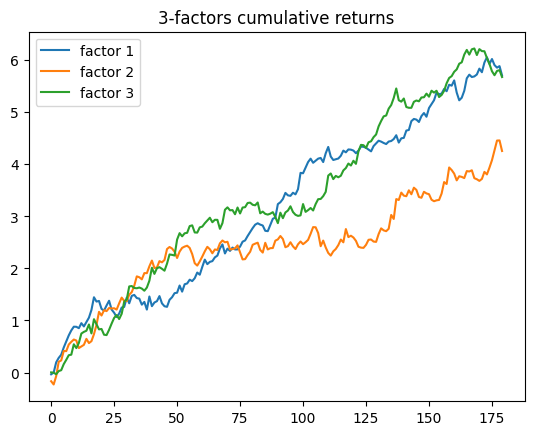

In [5]:
plt.plot(factors.cumsum(axis=0));
plt.legend([f'factor {i}'for i in range(1, 10)]);
plt.title('3-factors cumulative returns');

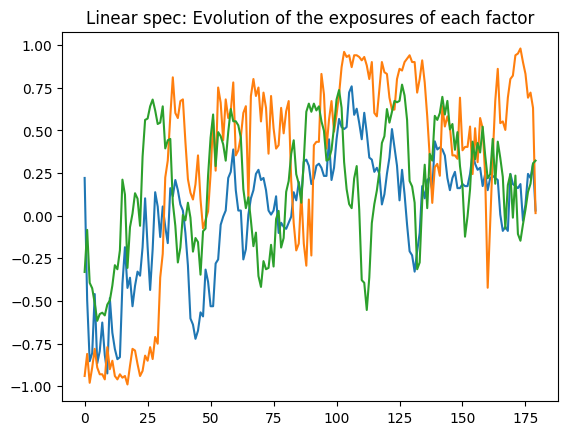

In [6]:
plt.plot(l_betas[:, 2, :]);
plt.title('Linear spec: Evolution of the exposures of each factor');

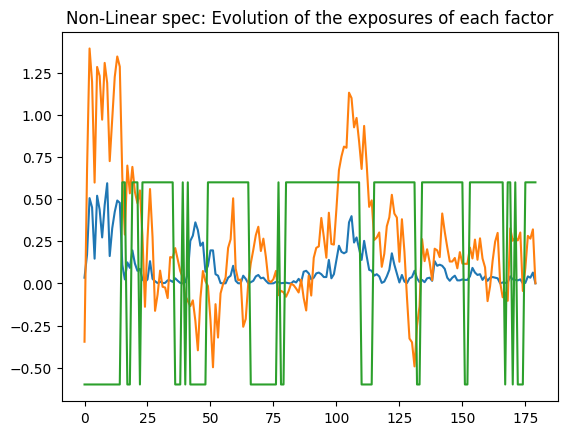

In [7]:
plt.plot(n_betas[:, 2, :]);
plt.title('Non-Linear spec: Evolution of the exposures of each factor');

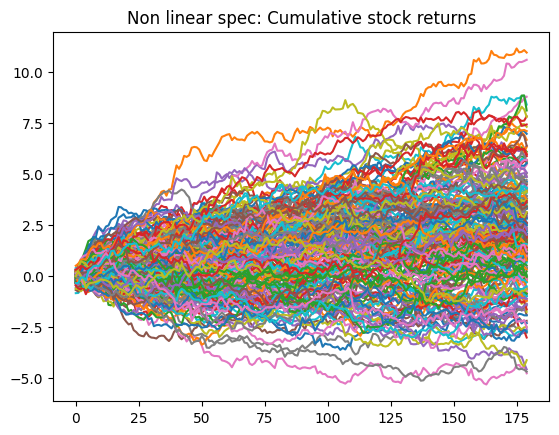

In [8]:
plt.plot(n_returns.cumsum(axis=0));
plt.title('Non linear spec: Cumulative stock returns');

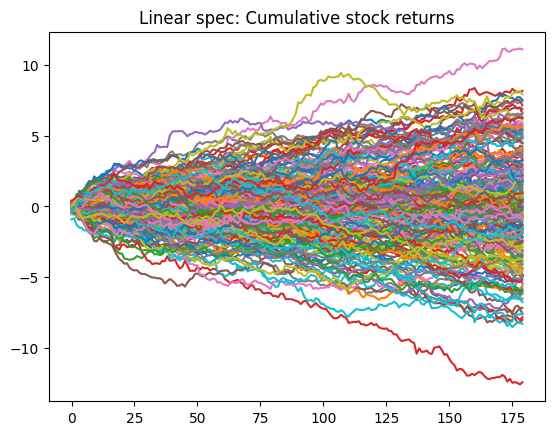

In [9]:
plt.plot(l_returns.cumsum(axis=0));
plt.title('Linear spec: Cumulative stock returns');

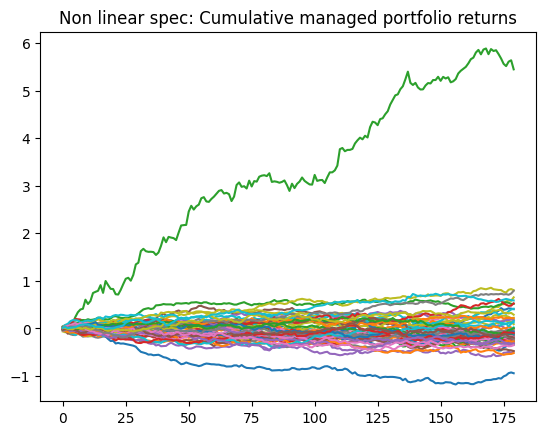

In [10]:
plt.plot(np.squeeze(n_managed).cumsum(axis=0));
plt.title('Non linear spec: Cumulative managed portfolio returns');

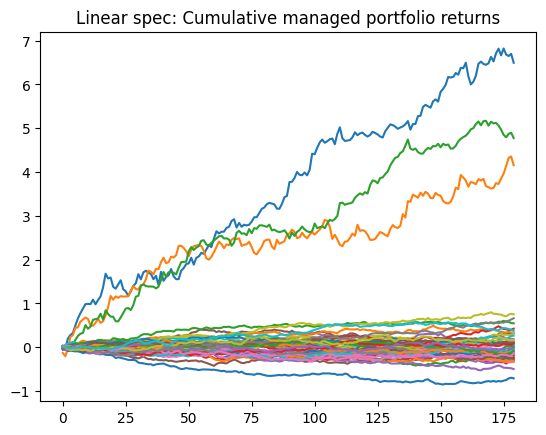

In [11]:
plt.plot(np.squeeze(l_managed).cumsum(axis=0));
plt.title('Linear spec: Cumulative managed portfolio returns');

In [18]:
from tqdm import tqdm

In [19]:
l_tot_r2_glob = 0
n_tot_r2_glob = 0
l_prd_r2_glob = 0
n_prd_r2_glob = 0
for i in tqdm(range(100)):

    (
        n_betas, l_betas,
        n_returns, l_returns,
        n_managed, l_managed,
        characteristics, factors
    ) = simulate()

    l_tot_r2 = 0
    l_prd_r2 = 0
    n_tot_r2 = 0
    n_prd_r2 = 0

    for t in range(180):
        l_tot_r2 += np.power(l_returns[t] - l_betas[t] @ factors[t].T, 2).sum()
        n_tot_r2 += np.power(n_returns[t] - n_betas[t] @ factors[t].T, 2).sum()
        f = factors[:t]
        if len(f) > 0:
            l_prd_r2 += np.power(l_returns[t] - l_betas[t] @ factors[:t].mean(axis=0).T, 2).sum()
            n_prd_r2 += np.power(n_returns[t] - n_betas[t] @ factors[:t].mean(axis=0).T, 2).sum()

    l_tot_r2 = 1 - l_tot_r2 / np.power(l_returns,2).sum()
    n_tot_r2 = 1 - n_tot_r2 / np.power(n_returns,2).sum()
    l_prd_r2 = 1 - l_prd_r2 / np.power(l_returns,2).sum()
    n_prd_r2 = 1 - n_prd_r2 / np.power(n_returns,2).sum()

    l_tot_r2_glob += l_tot_r2 / 100
    n_tot_r2_glob += n_tot_r2 / 100
    l_prd_r2_glob += l_prd_r2 / 100
    n_prd_r2_glob += n_prd_r2 / 100

100%|███████████████████████████████████████████████████████████████████| 100/100 [02:42<00:00,  1.63s/it]


In [20]:
round(100*l_tot_r2_glob, 2)

39.92

In [21]:
round(100*n_tot_r2_glob, 2)

39.37

In [22]:
round(100*l_prd_r2_glob, 2)

2.68

In [23]:
round(100*n_prd_r2_glob, 2)

2.49